## 傅立葉轉換（Fourier Transform）

### 基本概念
傅立葉轉換是一種數學變換，用來將信號從時域（時間序列）轉換到頻域（頻率序列）。這個變換的基本理念是將複雜的信號分解成不同頻率的正弦波和餘弦波的疊加。

### 數學表示
對於一個連續的信號 \( f(t) \)，其傅立葉轉換 \( F(\omega) \) 可以表示為：
\[ F(\omega) = \int_{-\infty}^{+\infty} f(t) e^{-j\omega t} \, dt \]
這裡：
- \( \omega \) 是角頻率
- \( j \) 是虛數單位，滿足 \( j^2 = -1 \)

### 逆傅立葉轉換
傅立葉轉換可以逆轉回時域信號，這個過程稱為逆傅立葉轉換，表示為：
\[ f(t) = \frac{1}{2\pi} \int_{-\infty}^{+\infty} F(\omega) e^{j\omega t} \, d\omega \]

## 快速傅立葉轉換（Fast Fourier Transform, FFT）

### 基本概念
快速傅立葉轉換是一種高效計算離散傅立葉轉換（Discrete Fourier Transform, DFT）的方法。DFT 是針對有限長度且離散的數據進行傅立葉轉換，其公式為：
\[ X(k) = \sum_{n=0}^{N-1} x(n) e^{-j \frac{2\pi}{N} kn} \]
這裡：
- \( N \) 是信號的點數
- \( x(n) \) 是第 \( n \) 個信號點
- \( X(k) \) 是第 \( k \) 個頻率分量

### FFT 的優點
FFT 通過分治法（Divide and Conquer）和蝶形運算（Butterfly Operations）將DFT的計算複雜度從 \( O(N^2) \) 降低到 \( O(N \log N) \)，顯著提高了計算速度。

### 實作例子（Python）
使用 Python 中的 NumPy 庫來進行 FFT 計算的簡單範例：

C:\Users\112033645\AppData\Local\Temp\ipykernel_4156\4150659818.py:27: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  plt.tight_layout()
C:\Users\112033645\AppData\Local\Temp\ipykernel_4156\4150659818.py:27: UserWarning: Glyph 38291 (\N{CJK UNIFIED IDEOGRAPH-9593}) missing from current font.
  plt.tight_layout()
C:\Users\112033645\AppData\Local\Temp\ipykernel_4156\4150659818.py:27: UserWarning: Glyph 31186 (\N{CJK UNIFIED IDEOGRAPH-79D2}) missing from current font.
  plt.tight_layout()
C:\Users\112033645\AppData\Local\Temp\ipykernel_4156\4150659818.py:27: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from current font.
  plt.tight_layout()
C:\Users\112033645\AppData\Local\Temp\ipykernel_4156\4150659818.py:27: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
C:\Users\112033645\AppData\Local\Temp\ipykernel_4156\4150659818.py:27: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDE

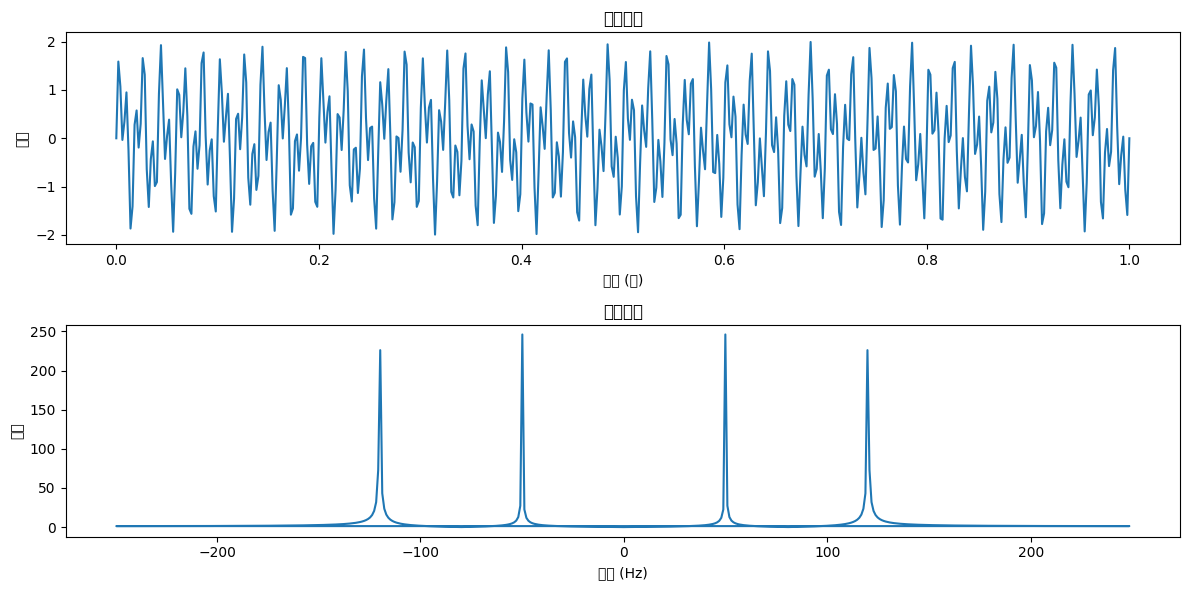

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 生成時間序列數據
t = np.linspace(0, 1, 500)
signal = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)

# 計算快速傅立葉轉換
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), t[1] - t[0])

# 繪製原始信號和頻域信號
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('原始信號')
plt.xlabel('時間 (秒)')
plt.ylabel('幅度')

plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_result))
plt.title('頻域信號')
plt.xlabel('頻率 (Hz)')
plt.ylabel('幅度')

plt.tight_layout()
plt.show()

針對圖像進行傅立葉轉換與快速傅立葉轉換的處理，可以用於圖像的頻域分析與處理，例如去除噪聲、邊緣檢測等。以下是如何在 Python 中使用 NumPy 和 OpenCV 來對圖像進行傅立葉變換和快速傅立葉變換的詳細說明及示例：

### 圖像傅立葉變換與快速傅立葉變換

#### 步驟：
1. 讀取圖像並轉換為灰度圖像。
2. 使用快速傅立葉變換 (FFT) 將圖像從空間域轉換到頻域。
3. 轉換結果的頻譜圖可視化。
4. 進行頻域上的處理（如濾波）。
5. 使用逆快速傅立葉變換 (Inverse FFT) 將圖像從頻域轉換回空間域。

### 解釋
1. **讀取圖像並轉換為灰度圖像**：使用 OpenCV 讀取圖像並轉換為灰度圖像。
    ```python
    img = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)
    ```

2. **進行快速傅立葉變換 (FFT)**：使用 NumPy 的 `fft2` 函數計算圖像的二維傅立葉變換，然後使用 `fftshift` 函數將零頻率分量移動到頻譜的中心。
    ```python
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    ```

3. **顯示原始圖像與頻譜圖**：使用 Matplotlib 顯示原始圖像和傅立葉變換頻譜圖。
    ```python
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('原始圖像')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('傅立葉變換頻譜圖')
    plt.axis('off')

    plt.show()
    ```

4. **頻域上的濾波**：例如，在頻域中對圖像進行高通濾波。
    ```python
    rows, cols = img.shape
    crow, ccol = rows // 2 , cols // 2
    fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
    ```

5. **使用逆快速傅立葉變換 (Inverse FFT)**：將頻域圖像轉換回空間域，得到處理後的圖像。
    ```python
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    plt.figure(figsize=(6, 6))
    plt.imshow(img_back, cmap='gray')
    plt.title('濾波後的圖像')
    plt.axis('off')
    plt.show()
    ```

這個範例展示了如何對圖像進行傅立葉變換與快速傅立葉變換，並展示了頻域處理的應用。你可以根據具體需求進行更多的頻域操作，如低通濾波、去噪等。

f:\Code\LabENV\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
f:\Code\LabENV\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
f:\Code\LabENV\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20613 (\N{CJK UNIFIED IDEOGRAPH-5085}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
f:\Code\LabENV\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31435 (\N{CJK UNIFIED IDEOGRAPH-7ACB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
f:\Code\LabENV\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33865 (\N{CJK UNIFIED IDEOGRAPH-8449}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
f:\Code\LabENV\Lib\site-packages\IPython

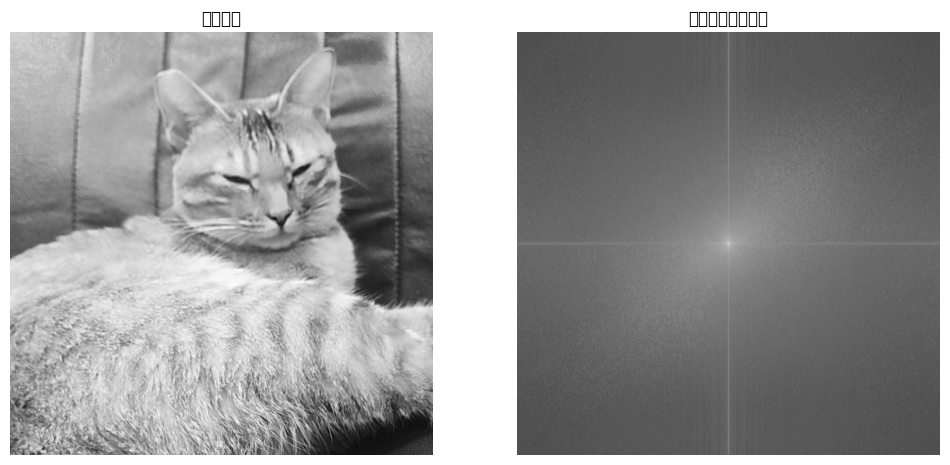

f:\Code\LabENV\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28670 (\N{CJK UNIFIED IDEOGRAPH-6FFE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
f:\Code\LabENV\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27874 (\N{CJK UNIFIED IDEOGRAPH-6CE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
f:\Code\LabENV\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
f:\Code\LabENV\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


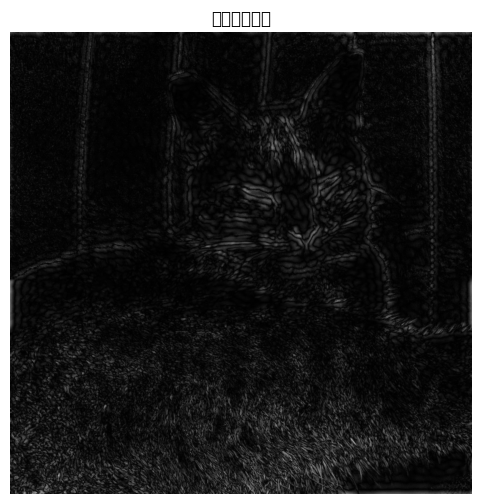

In [3]:
#### 實作範例（Python）：
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取圖像並轉換為灰度圖像
img = cv2.imread(r'F:\Code\Digtal-Image-Processing\Code\Resources\Data\LAB_CAT2.jpg', cv2.IMREAD_GRAYSCALE)

# 進行快速傅立葉變換 (FFT)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# 顯示原始圖像與頻譜圖
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('原始圖像')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('傅立葉變換頻譜圖')
plt.axis('off')

plt.show()

# 頻域上的濾波（例如，高通濾波）
rows, cols = img.shape
crow, ccol = rows // 2 , cols // 2
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0

# 使用逆快速傅立葉變換 (Inverse FFT)
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# 顯示濾波後的圖像
plt.figure(figsize=(6, 6))
plt.imshow(img_back, cmap='gray')
plt.title('濾波後的圖像')
plt.axis('off')
plt.show()